# Overview

## Dataset
Será utilizado este [dataset](https://www.kaggle.com/datasets/mexwell/crop-diseases-classification) para trabalhar com um problema de classificação multiclasses

# Imports

- Importando as bibliotecas necessárias:
    - `pandas` é importado para manipulação de dados.
    - `matplotlib.pyplot` é importado para visualização de dados.
    - `seaborn` é importado para visualização estatística de dados.
    - `train_test_split` é importado de `sklearn.model_selection` para dividir os dados em conjuntos de treinamento e teste.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms
import random

# Análise exploratória de dados

Antes de definir o que iremos fazer sobre os dados, será feito uma análise exploratória inicial. Para isso, vamos entender melhor os dados.
- Carregando os dados:
    - `pd.read_csv()` é usado para ler o arquivo CSV que contém os dados.
    - O caminho para o arquivo CSV é "/kaggle/input/crop-diseases-classification/Data/train.csv".
    - Os dados são armazenados em um DataFrame chamado `dsDiseases`.

In [35]:
dsDiseases = pd.read_csv("/kaggle/input/crop-desntz/train.csv")

In [71]:
dir0='/kaggle/input/crop-diseases-classification/Data/train_images'

class_names=[0,1,2,3,4]
image_ids=dsDiseases['image_id'].tolist()
dsDiseases['path']=dsDiseases['image_id'].apply(lambda x:os.path.join(dir0,x))
display(dsDiseases)
print(len(dsDiseases))

,image_id,label,path
0,1000015157.jpg,0,/kaggle/input/crop-diseases-classification/Dat...
1,1000201771.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
2,100042118.jpg,1,/kaggle/input/crop-diseases-classification/Dat...
3,1000723321.jpg,1,/kaggle/input/crop-diseases-classification/Dat...
4,1000812911.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
...,...,...,...
21392,999068805.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
21393,999329392.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
21394,999474432.jpg,1,/kaggle/input/crop-diseases-classification/Dat...
21395,999616605.jpg,4,/kaggle/input/crop-diseases-classification/Dat...


21397


In [73]:
files=[]
paths=[]
for dirname, _, filenames in os.walk(dir0):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
        files+=[filename]
print(len(paths))

17938


In [88]:
drops=[]
for i in range(len(dsDiseases)):
    if dsDiseases.iloc[i,0] not in files:
        drops+=[i]
dsDiseases=dsDiseases.drop(drops,axis=0).reset_index(drop=True)
display(dsDiseases)

,image_id,label,path
0,157078263.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
1,1574893536.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
2,1575013487.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
3,1576606254.jpg,0,/kaggle/input/crop-diseases-classification/Dat...
4,1579761476.jpg,1,/kaggle/input/crop-diseases-classification/Dat...
...,...,...,...
17933,999068805.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
17934,999329392.jpg,3,/kaggle/input/crop-diseases-classification/Dat...
17935,999474432.jpg,1,/kaggle/input/crop-diseases-classification/Dat...
17936,999616605.jpg,4,/kaggle/input/crop-diseases-classification/Dat...


Nessa primeira parte, vamos entender o que é cada coluna:
- Examinando as primeiras linhas do DataFrame:
    - `head()` é usado para visualizar as primeiras linhas do DataFrame `dsDiseases`.
    - Isso ajuda a ter uma ideia inicial da estrutura e dos dados presentes no DataFrame.

In [60]:
dsDiseases.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


Para uma visão ampla em relação aos dados, podemos plotar dois gráficos: um gráfico em barras (com a contagem de cada categoria) e um gráfico em pizza (com a porcentagem das categorias).
- Contagem e visualização das categorias:
    - `value_counts()` é usado para contar o número de ocorrências de cada categoria na coluna 'label' do DataFrame `dsDiseases`.
    - Os resultados são armazenados na variável `counts`.
    - Um gráfico de barras é criado usando `sns.barplot()` para visualizar a contagem de cada categoria.
    - `counts.index` é usado como os valores no eixo x (categorias).
    - `counts.values` é usado como os valores no eixo y (contagem).
    - O título do gráfico é definido como 'Crop diseases'.
    - Os rótulos dos eixos x e y são definidos como 'Categorias' e 'Contagem', respectivamente.
    - `plt.show()` é usado para exibir o gráfico.

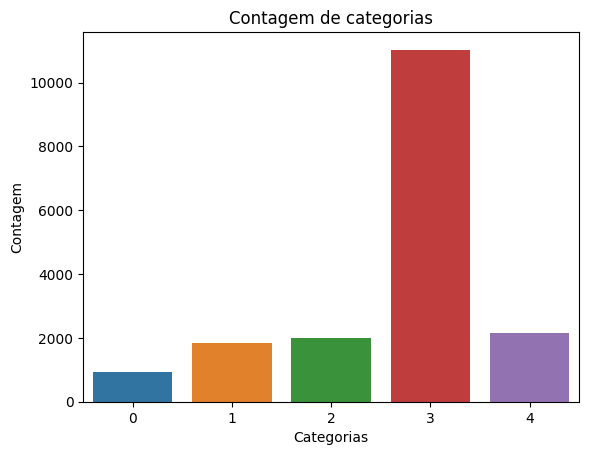

In [89]:
# Contagem das categorias
counts = dsDiseases['label'].value_counts()

# Plot
sns.barplot(x=counts.index, y=counts.values)
plt.title('Contagem de categorias')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.show()

- Visualização das categorias em um gráfico de pizza:
    - `plt.pie()` é usado para criar um gráfico de pizza com as porcentagens de cada categoria.
    - `counts` é passado como os dados para o gráfico de pizza.
    - `labels=counts.index` é usado para rotular as fatias do gráfico de acordo com as categorias.
    - `autopct='%1.1f%%'` formata as porcentagens exibidas em cada fatia.
    - `startangle=140` define o ângulo inicial da pizza para uma melhor visualização.
    - `plt.title()` define o título do gráfico como 'Crop diseases'.
    - `plt.axis('equal')` garante que a pizza seja desenhada como um círculo.
    - `plt.show()` é usado para exibir o gráfico de pizza.

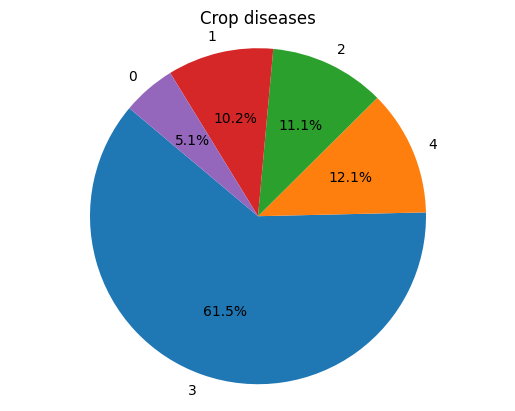

In [90]:
# Plot
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Crop diseases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Divisão de treino, teste e validação

Bom, após vizualizarmos ambos os gráficos, percebemos que está desbalanceado, pois a categoria 3 possui 61.5% de amostras, o que é um valor maior do que a soma de todas as outras categorias, isso para um dataset não é bom, por isso vamos para a etapa de Divisão de treino, teste e validação de dados para o nosso dataset.

In [91]:
# Divisão dos dados em conjuntos de treinamento e teste, mantendo as amostras proporcionais
train_data, test_data = train_test_split(dsDiseases, test_size=0.2, random_state=42, stratify=dsDiseases['label'])

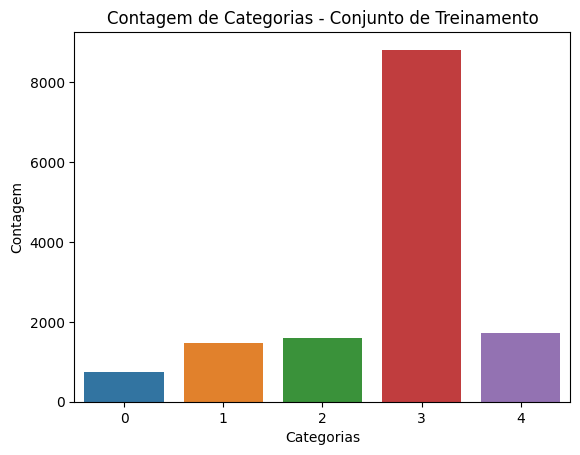

In [92]:
# Plot dos dados de treinamento
sns.barplot(x=train_data['label'].value_counts().index, y=train_data['label'].value_counts().values)
plt.title('Contagem de Categorias - Conjunto de Treinamento')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.show()

In [51]:
train_data.head()

,image_id,label
1715,1300823152.jpg,4
11830,3116613979.jpg,3
8621,2530012971.jpg,3
3849,1686186154.jpg,3
12924,3312736716.jpg,1


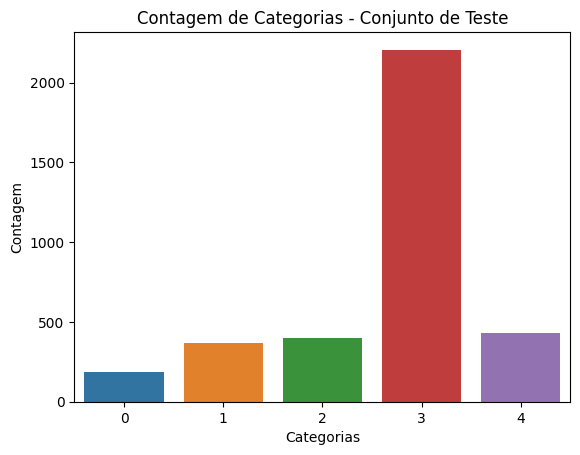

In [93]:
# Plot dos dados de teste
sns.barplot(x=test_data['label'].value_counts().index, y=test_data['label'].value_counts().values)
plt.title('Contagem de Categorias - Conjunto de Teste')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.show()

In [94]:
# Contar amostras por classe
count_per_class = train_data['label'].value_counts()
print("Contagem de amostras por classe antes de balancear:", count_per_class)

Contagem de amostras por classe antes de balancear: label
3    8821
4    1733
2    1594
1    1465
0     737
Name: count, dtype: int64


# Tratamento de dados

Técnicas de pré processamento acontecem dentro do dataset, antes de passar para o modelo, para que o dataset fique balanceado e tanto ele quanto o resultado seja justo.

Task:
Objetivo: Deixar todas as classes com a mesma quantidade. Aqui iremos deixar todas com o mesmo valor da classe 2, por ser a mediana.

- Classe 3 e 4: Recorte de dataset
    
    Será eliminado, de maneira aleatória, (classe3 - classe2) quantidades
    
    Motivo: Para diminuir a quantidade

- Classes 0 e 1: Data augmentation
   
    Motivo: Todas essas duas classes possuem uma amostragem muito menor. Sendo assim, iremos aumentar, através de técnicas de rotação e iluminação, os dados dessas classes. Com isso, teremos a mesma quantidade de dados da classe 2

## Treino 

## Lidando com a classe 3 e 4

### Classe 3

In [95]:
import pandas as pd

while len(train_data[train_data['label'] == 3]) > len(train_data[train_data['label'] == 2]):
    # Drop one sample from class '3'
    index_to_drop = train_data[train_data['label'] == 3].index[0]  
    train_data = train_data.drop(index_to_drop) 


### Classe 4

In [96]:
import pandas as pd

while len(train_data[train_data['label'] == 4]) > len(train_data[train_data['label'] == 2]):
    # Drop one sample from class '3'
    index_to_drop = train_data[train_data['label'] == 4].index[0]  
    train_data = train_data.drop(index_to_drop) 

Conferindo o resultado

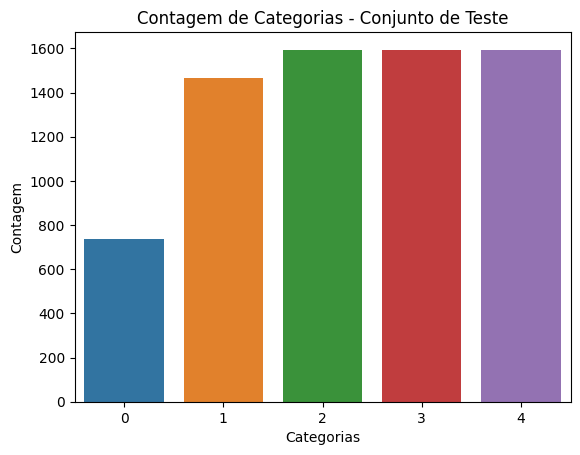

In [97]:
sns.barplot(x=train_data['label'].value_counts().index, y=train_data['label'].value_counts().values)
plt.title('Contagem de Categorias - Conjunto de Teste')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.show()

In [98]:
# Contar amostras por classe
count_per_class = train_data['label'].value_counts()
print("Contagem de amostras por classe antes de balancear:", count_per_class)

Contagem de amostras por classe antes de balancear: label
2    1594
4    1594
3    1594
1    1465
0     737
Name: count, dtype: int64


## Lidando com as classes 0 e 1

Para fazer este data augmentation, você deverá lidar com as seguintes questões:
- Onde salvar as imagens novas
- Acrescentar elas no CSV

Processo indicado:
1. Criar uma pasta
2. Transferir todas as imagens de /kaggle/input/crop-diseases-classification/Data/train_images para a nova pasta
3. Fazer o data augmentation
4. Adicionar o nome das novas imagens e a classe no CSV


## Classe 0

## Classe 1

## Lidando com a classe 0 e 1

## Teste

# Normalização de dados

# Escolha modelo

# Treinamento

# Avaliação do modelo